# FORWARD STEPWISE REGRESSION

In [12]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import sys
pd.set_option("display.precision",3)

Importar datos

In [13]:
r=r'winequality-red.csv'
data=pd.read_csv(r,sep=";")
nombres=data.columns

In [14]:
# Función para extraer las columnas(idxSet) de la matriz x 
def xattrSelect(x,idxSet):
    xOut=[]
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)

Error de las variables en la prueba: 
  [0.7033921475398849, 0.6583312812660712, 0.6544795374737207, 0.6510531058760466, 0.648420082658067, 0.6456774927047078, 0.6448033461155463, 0.6445818094145916, 0.6445236172441899, 0.6448462561260481, 0.6451934849046345]

Indice de los mejores atributos: 
 [10, 1, 9, 6, 4, 8, 5, 3, 2, 0, 7]
Los mejores atributos son:
 ['alcohol', 'volatile acidity', 'sulphates', 'total sulfur dioxide', 'chlorides', 'pH', 'free sulfur dioxide', 'residual sugar', 'citric acid', 'fixed acidity', 'density']


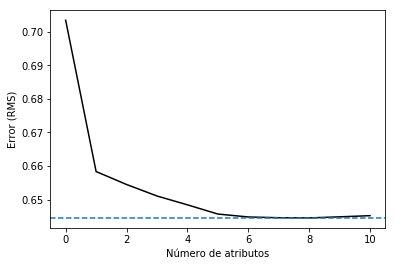

In [15]:
# Cargar los datos y división de los datos

X= data.drop("quality",axis=1)
y=data["quality"]
names=data.columns

indices=range(len(X))
X_train=[X.iloc[i] for i in indices if i%3 == 0]
X_test= [X.iloc[i] for i in indices if i%3 != 0]
y_train= [y.iloc[i] for i in indices if i%3 == 0]
y_test= [y.iloc[i] for i in indices if i%3 != 0]

# Construir una lista de atributos
attributelist=[]
index= range(len(X.iloc[1]))
indexSet=set(index)
indexSeq=[]
oosError=[]

for i in index:
    attSet=set(attributelist)
    attTrySet= indexSet-attSet
    attTry=[ii for ii in attTrySet]
    errorlist=[]
    attTemp=[]
    
    for iTry in attTry:
        attTemp=[]+attributelist # Borra la lista y toma la mejor variable del paso anterior
        attTemp.append(iTry) # Agrega el índice a la lista para ir tomando las posibles comparaciones de las variables
        xTrainTemp=xattrSelect(X_train,attTemp)
        xTestTemp=xattrSelect(X_test,attTemp)
        xTrain=np.array(xTrainTemp)
        yTrain=np.array(y_train)
        xTest=np.array(xTestTemp)
        yTest=np.array(y_test)
        
        wineQModel=linear_model.LinearRegression()
        wineQModel.fit(xTrain,yTrain)
        rmsError=np.linalg.norm((yTest-wineQModel.predict(xTest)),2)/sqrt(len(yTest))
        errorlist.append(rmsError)
        attTemp=[]
    iBest=np.argmin(errorlist)
    attributelist.append(attTry[iBest])
    oosError.append(errorlist[iBest])

print("Error de las variables en la prueba: \n ", oosError)
print("\n"+"Indice de los mejores atributos: \n",attributelist)
nameList=[names[i] for i in attributelist]
print("Los mejores atributos son:\n",nameList)

# Gráfico de error vs número de atributos
x=range(len(oosError))
plt.plot(x,oosError,"k-")
plt.axhline(np.min(oosError),linestyle="--")
plt.xlabel("Número de atributos")
plt.ylabel("Error (RMS)")
plt.show()


In [16]:
attributelist

[10, 1, 9, 6, 4, 8, 5, 3, 2, 0, 7]

In [17]:
names[11]

'quality'

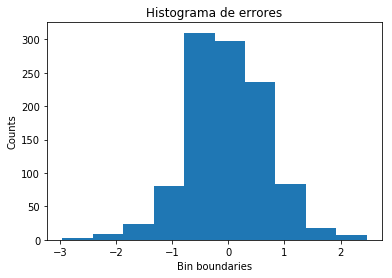

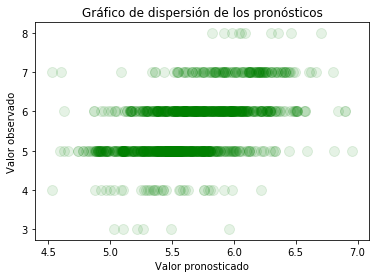

In [18]:
#Histograma de errores tomando los mejores atributos
indexBest=oosError.index(min(oosError))
attributeBest=attributelist[1:(indexBest+1)]

xTrainTemp=xattrSelect(X_train,attributeBest)
xTestTemp=xattrSelect(X_test,attributeBest)
xTrain=np.array(xTrainTemp)
xTest=np.array(xTestTemp)

wineQModel=linear_model.LinearRegression()
wineQModel.fit(xTrain,yTrain)
errorvector=yTest-wineQModel.predict(xTest)
plt.hist(errorvector)
plt.xlabel("Bin boundaries")
plt.ylabel("Counts")
plt.title("Histograma de errores")
plt.show()

plt.figure("Diagrama de dispersión")
plt.scatter(wineQModel.predict(xTest),yTest,s=100,alpha=0.1,c="g")
plt.xlabel("Valor pronosticado")
plt.ylabel("Valor observado")
plt.title("Gráfico de dispersión de los pronósticos")
plt.show()

En este código se crean dos "bucles", en el primero se generan listas, mientras que en el segundo se evaluan las características y luego se comparan para elegir la que genere el menor error. Inicialmente se evalua una a una las características (variables) y así se va aumentando hasta cubrir todas las variables

# Ridge regression

0.6451934849046346 alpha = 0.00
0.6443809347442653 alpha = 0.10
0.6441270245029114 alpha = 0.20
0.6439994621066125 alpha = 0.30
0.6439507791481435 alpha = 0.40
0.6439524999187728 alpha = 0.50
0.6439870224871945 alpha = 0.60


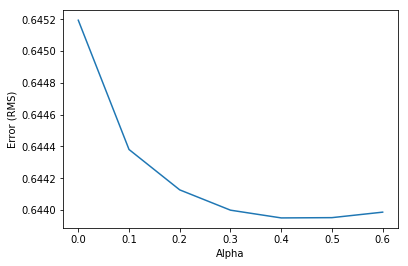

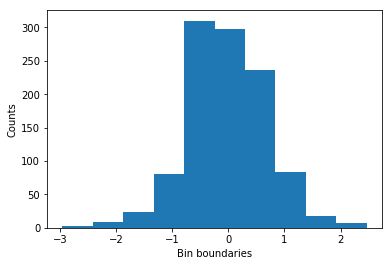

In [19]:
alphaList=[0.1* i for i in range(7)]

rmsError=[]
for alph in alphaList:
    wineRidgeModel= linear_model.Ridge(alpha=alph)
    wineRidgeModel.fit(X_train,y_train)
    rmsError.append(np.linalg.norm((y_test-wineRidgeModel.predict(X_test)),2)/sqrt(len(y_test)))

for i in range(len(rmsError)):
    print(rmsError[i], "alpha = %.2f" %alphaList[i])
    
# Gráfico de errores vs alpha
x=alphaList
y=rmsError

plt.plot(x,y)
plt.ylabel("Error (RMS)")
plt.xlabel("Alpha")
plt.show()

#

indexBest=rmsError.index(min(rmsError))
alph=alphaList[indexBest]
wineRidgeModel=linear_model.Ridge(alpha=alph)
wineRidgeModel.fit(X_train,y_train)
errorVector=y_test-wineRidgeModel.predict(X_test)

plt.hist(errorvector)
plt.xlabel("Bin boundaries")
plt.ylabel("Counts")
plt.show()